In [1]:
#import required libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

2023-01-05 10:59:23.085015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 10:59:23.252400: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-05 10:59:23.252423: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-05 10:59:24.029067: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
#using image data generator to import the images from the dataset
#divide dataset into train and validation dataset
train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                             horizontal_flip=True,validation_split=0.25)

In [3]:
#train dataset,we have to make sure that same target size as initialized for the image size
train_data=train_gen.flow_from_directory("/home/ubuntu/Downloads/malaria dataset/cell_images/cell_images",
                                          target_size=(224,224),batch_size=64,
                                         class_mode="binary",subset="training")

Found 20670 images belonging to 2 classes.


In [4]:
#validation dataset
validation_data=train_gen.flow_from_directory("/home/ubuntu/Downloads/malaria dataset/cell_images/cell_images",
                                          target_size=(224,224),batch_size=64,
                                              class_mode="binary",subset="validation")

Found 6888 images belonging to 2 classes.


In [16]:
validation_data.class_indices

{'Parasitized': 0, 'Uninfected': 1}

# Model Creation

In [5]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPool2D(3,3))


model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPool2D(3,3))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.50))
model.add(BatchNormalization())

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(1,activation = 'sigmoid'))

2023-01-05 10:59:25.673365: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-05 10:59:25.673404: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-05 10:59:25.673438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-Zako): /proc/driver/nvidia/version does not exist
2023-01-05 10:59:25.673692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0

In [7]:
# compiling the model by telling the model which cost and optimization method to use
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [8]:
# to avoid overfittig 
early_stop = EarlyStopping(monitor ='val_loss',patience =2)

In [9]:
#fit the model
history=model.fit(train_data,validation_data=validation_data,callbacks=[early_stop],epochs = 5)
history

Epoch 1/5


2023-01-05 10:59:28.942658: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 807469056 exceeds 10% of free system memory.
2023-01-05 10:59:30.870852: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 807469056 exceeds 10% of free system memory.


  1/323 [..............................] - ETA: 31:58 - loss: 1.0808 - accuracy: 0.4219

2023-01-05 10:59:32.714024: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 807469056 exceeds 10% of free system memory.
2023-01-05 10:59:34.810295: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 807469056 exceeds 10% of free system memory.


  2/323 [..............................] - ETA: 19:21 - loss: 1.0308 - accuracy: 0.4297

2023-01-05 10:59:36.332066: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 807469056 exceeds 10% of free system memory.


323/323 [==============================] - 1186s 4s/step - loss: 0.5900 - accuracy: 0.6775 - val_loss: 0.3303 - val_accuracy: 0.9292
Epoch 2/5
323/323 [==============================] - 1172s 4s/step - loss: 0.2151 - accuracy: 0.9324 - val_loss: 0.1562 - val_accuracy: 0.9502
Epoch 3/5
323/323 [==============================] - 1216s 4s/step - loss: 0.1777 - accuracy: 0.9466 - val_loss: 0.1424 - val_accuracy: 0.9514
Epoch 4/5
323/323 [==============================] - 1350s 4s/step - loss: 0.1644 - accuracy: 0.9497 - val_loss: 0.1372 - val_accuracy: 0.9534
Epoch 5/5
323/323 [==============================] - 1282s 4s/step - loss: 0.1637 - accuracy: 0.9512 - val_loss: 0.1372 - val_accuracy: 0.9553


In [11]:
model.save('mal_model.h5')

In [12]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

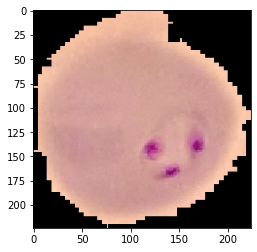

In [14]:
img=load_img('/home/ubuntu/Downloads/malaria dataset/cell_images/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png',target_size=(224,224,3))
plt.imshow(img)

In [15]:
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
img=img/255

In [18]:
predict=model.predict(img)
if predict<=0.5:
    print('Parasitized')
else:
    print('Uninfected')

1/1 [==============================] - 0s 187ms/step
Parasitized


In [19]:
np.round(model.predict(img))

1/1 [==============================] - 0s 39ms/step


array([[0.]], dtype=float32)

In [20]:
print(predict)

[[0.00064356]]
